# Room Encoding Server Demo


In [1]:
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
import utils

## ⚙️ Server Configuration

In [2]:
# Server configuration
SERVER_URL = "http://localhost:8082"
response = requests.get(f"{SERVER_URL}/")
print("✅ Server online" if response.status_code == 200 else "❌ Server offline")

✅ Server online


## 👉 Single window

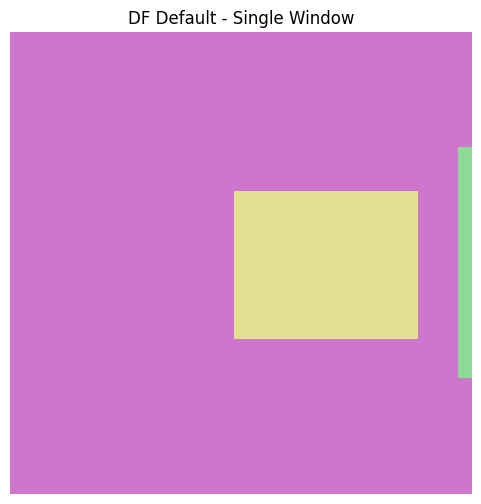

In [3]:
# Load payload from JSON file
with open("../assets/df_default_single.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_df_default.png").write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

In [4]:
import requests
# SERVER_URL = "http://51.15.197.220:8082"

pld = {
  "parameters": {
    "room_polygon": [[0, 0], [0, 7], [-3, 7], [-3, 0]],
    "windows": {
      "window_id": {
        # "x1": -0.4, "y1": 7, "z1": 10.9,
        # "x2": -2, "y2": 7.2, "z2": 11.9,
        "x1": 0,
        "y1": 1,
        "z1": 2.8,
        "x2": 0.4,
        "y2": 1.8,
        "z2": 5.4,
      }
    }
  }
}

response = requests.post(f"{SERVER_URL}/calculate-direction", json=pld)
response.json() 


{'direction_angle': {'window_id': 0.0}}

['test_window_1_image', 'test_window_1_mask', 'test_window_2_image', 'test_window_2_mask']


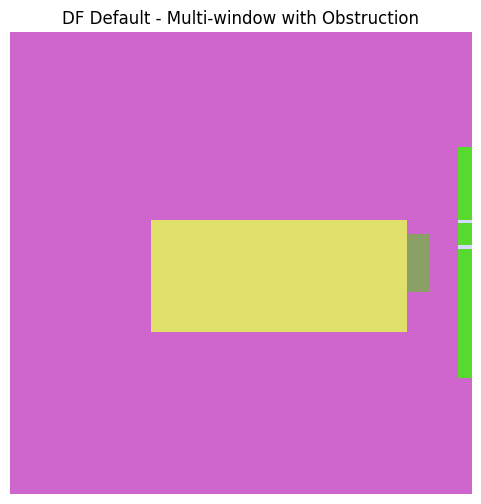

In [5]:
# Prepare obstruction array
oa = [0] * 64
oa[20] = 90
oa[27] = 90

obstruction_request = {
    "model_type": "df_default",  # Valid values: df_default, da_default, df_custom, da_custom
    "parameters": {
        "height_roof_over_floor": 10,
        "floor_height_above_terrain": 1.1,
        "room_polygon": [[0, 0], [0, 7], [-3, 7], [-3, 0]],
        "windows": {
            "test_window_1": {
                "x1": 0,
                "y1": 1,
                "z1": 2.8,
                "x2": 0.2,
                "y2": 1.8,
                "z2": 5.4,
                "window_frame_ratio": 0.41,
                # "direction_angle": 1.5708,
                "horizon": oa,  # Now supports both scalar (float) and array (list) values
                "zenith": oa
            },
            "test_window_2": {
                "x1": -0.4, "y1": 0, "z1": 2.8,
                "x2": -2.0, "y2": -0.6, "z2": 5.4,
                "window_frame_ratio": 0.41,
                "direction_angle": -1.5708,
                "horizon": oa,
                "zenith": oa
            }
        }
    }
}

response = requests.post(f"{SERVER_URL}/encode", json=obstruction_request)

if response.status_code == 200:
    npz_data = np.load(io.BytesIO(response.content))
    keys = list(npz_data.keys())
    print(keys)
    image_key = [k for k in keys if k.endswith('image')][1]
    mask_key = [k for k in keys if k.endswith('mask')][1]

    image = npz_data[image_key]
    mask = npz_data[mask_key]
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("DF Default - Multi-window with Obstruction")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)

In [7]:
# Prepare obstruction array
oa = [0] * 64
oa[20] = 90
oa[27] = 90

obstruction_request = {
    "model_type": "df_default",  # Valid values: df_default, da_default, df_custom, da_custom
    "parameters": {
        "height_roof_over_floor": 10,
        "floor_height_above_terrain": 1.1,
        "room_polygon": [[50, 50], [55, 39], [55, 26], [50, 26], [50, 39], [49, 39], [49, 50]],
        "windows": {
            "test_window": {
                "x1": 49.8, "y1": 39, "z1": 1.3,
                "x2": 49.2, "y2": 39.5, "z2": 2.2,
                "window_frame_ratio": 0.6,
                # "direction_angle": 1.5708,
                "horizon": oa,  # Now supports both scalar (float) and array (list) values
                "zenith": oa
            }
        }
    }
}

response = requests.post(f"{SERVER_URL}/encode", json=obstruction_request)

if response.status_code == 200:
    npz_data = np.load(io.BytesIO(response.content))
    keys = list(npz_data.keys())
    print(keys)
    image_key = [k for k in keys if k.endswith('image')][0]
    mask_key = [k for k in keys if k.endswith('mask')][0]

    image = npz_data[image_key]
    mask = npz_data[mask_key]
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("DF Default - Single Window with Obstruction")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)

ValueError: Cannot load file containing pickled data when allow_pickle=False

## 👉 Multiwindow

['bedroom_east_image', 'bedroom_east_mask', 'living_room_south_image', 'living_room_south_mask', 'kitchen_north_image', 'kitchen_north_mask']


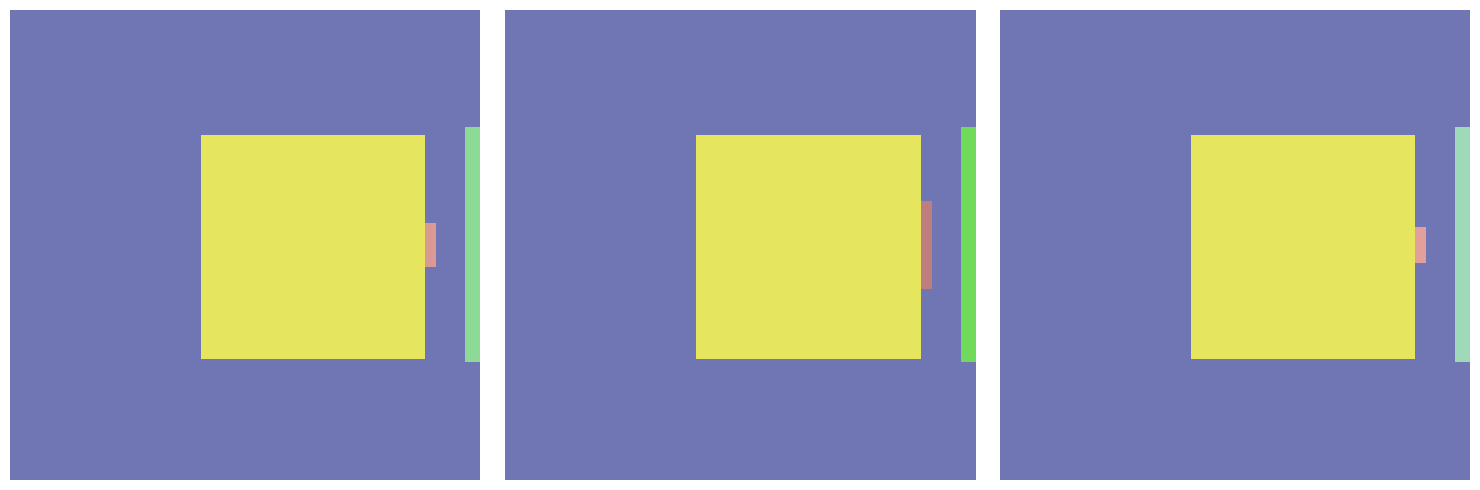

In [8]:
import zipfile
# Load multi-window payload from JSON file
with open("../assets/df_custom_multi_window.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_multi_window.zip").write_bytes(response.content)
    
    images = {}
    # with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    npz_data = np.load(io.BytesIO(response.content))
    keys = list(npz_data.keys())
    print(keys)
    image_keys = [k for k in keys if k.endswith('image')]
    mask_keys = [k for k in keys if k.endswith('mask')]
    for i in range(len(image_keys)):
        image = npz_data[image_keys[i]]
        mask = npz_data[mask_keys[i]]
        images[i] = image
        # images[name.replace('.png', '')] = Image.open(io.BytesIO(z.read(name)))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for idx, (window_id, img) in enumerate(images.items()):
        axes[idx].imshow(img)
        # axes[idx].set_title(window_id.replace("_", " ").title())
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

## 👉 DA single window

In [9]:
# Load payload from JSON file
inp_file = "da_default_single"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

❌ Error: 400


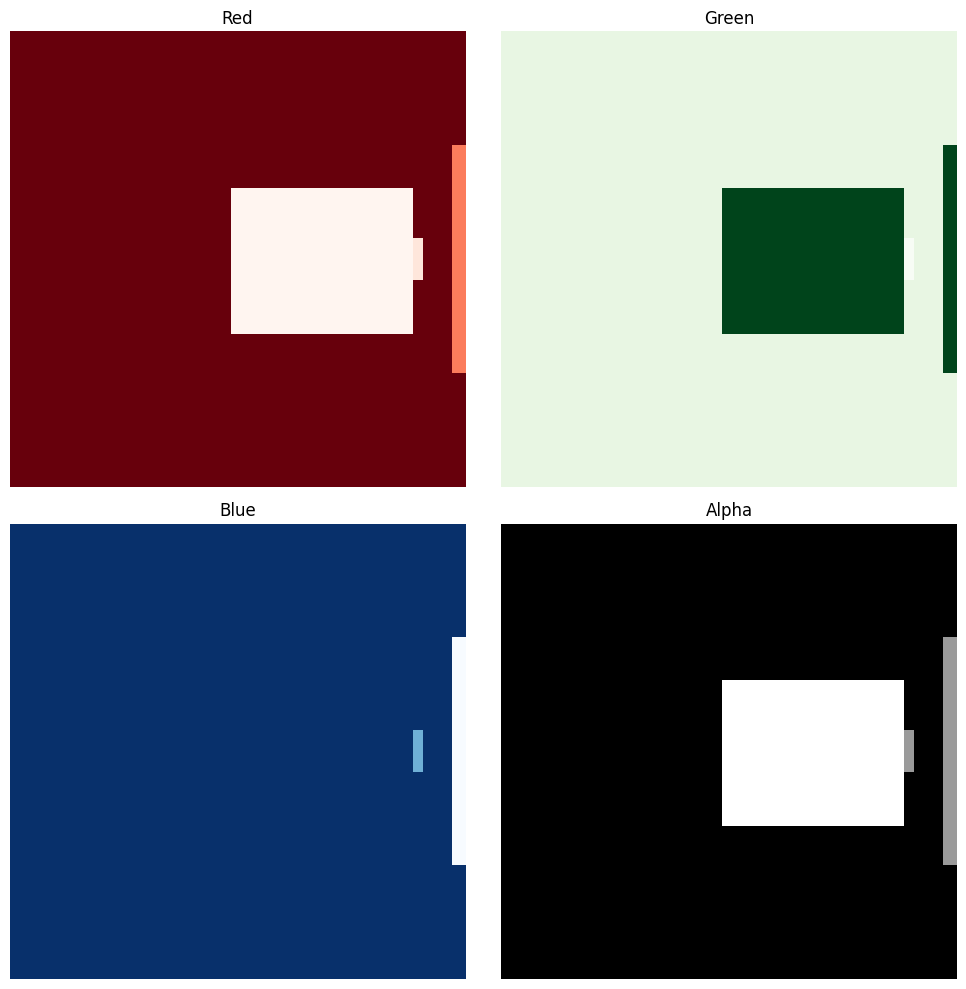

In [163]:
utils.show_individual_channels(inp_file)

### L-shaped multiwindow

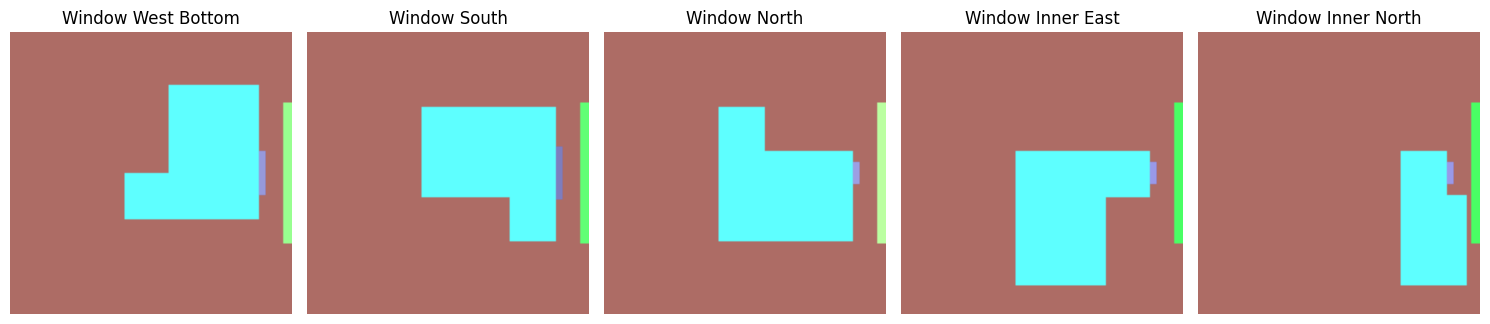

In [164]:
# Load multi-window payload from JSON file
with open("../assets/l_shaped_multi.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_multi_window.zip").write_bytes(response.content)
    
    images = {}
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        for name in z.namelist():
            images[name.replace('.png', '')] = Image.open(io.BytesIO(z.read(name)))
    
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, (window_id, img) in enumerate(images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(window_id.replace("_", " ").title())
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

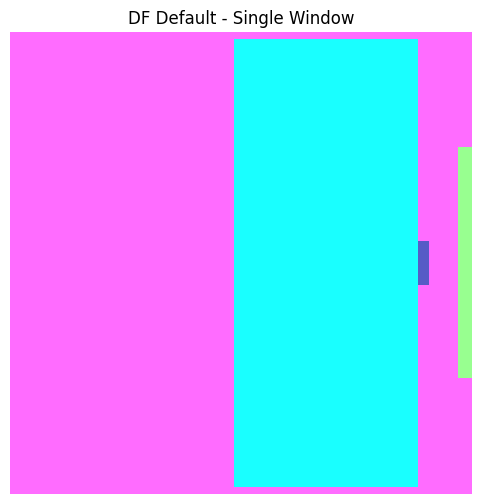

In [166]:
# Load multi-window payload from JSON file
inp_file = "long_room"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

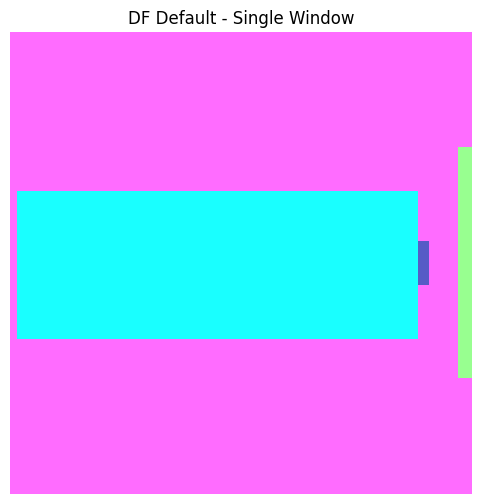

In [168]:
inp_file = "wide_room"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

In [ ]:
curl -X POST http://localhost:8082/encode \
  -H "Content-Type: application/json" \
  -d '{
    "model_type": "df_default",
    "parameters": {
      "height_roof_over_floor": 10,
      "floor_height_above_terrain": 1.1,
      "room_polygon": [[0, 0], [0, 7], [-3, 7], [-3, 0]],
      "windows": {
        "test_window_1": {
          "x1": 0,
          "y1": 1,
          "z1": 2.8,
          "x2": 0.2,
          "y2": 1.8,
          "z2": 5.4,
          "window_frame_ratio": 0.41,
          "horizon": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          "zenith": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        },
        "test_window_2": {
          "x1": -0.4,
          "y1": 0,
          "z1": 2.8,
          "x2": -2.0,
          "y2": -0.6,
          "z2": 5.4,
          "window_frame_ratio": 0.41,
          "direction_angle": -1.5708,
          "horizon": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          "zenith": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        }
      }
    }
  }' > response.npz